In [1]:
import networkx as nx
import itertools
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
def draw_2d_simplicial_complex(simplices, pos=None, return_pos=False, ax = None, extra_nodes=None):
    """
    Draw a simplicial complex up to dimension 2 from a list of simplices, as in [1].
        
        Args
        ----
        simplices: list of lists of integers
            List of simplices to draw. Sub-simplices are not needed (only maximal).
            For example, the 2-simplex [1,2,3] will automatically generate the three
            1-simplices [1,2],[2,3],[1,3] and the three 0-simplices [1],[2],[3].
            When a higher order simplex is entered only its sub-simplices
            up to D=2 will be drawn.
        
        pos: dict (default=None)
            If passed, this dictionary of positions d:(x,y) is used for placing the 0-simplices.
            The standard nx spring layour is used otherwise.
           
        ax: matplotlib.pyplot.axes (default=None)
        
        return_pos: dict (default=False)
            If True returns the dictionary of positions for the 0-simplices.
            
        References
        ----------    
        .. [1] I. Iacopini, G. Petri, A. Barrat & V. Latora (2018)
               "Simplicial Models of Social Contagion".
               arXiv preprint arXiv:1810.07031..
    """

    
    #List of 0-simplices
    nodes =list(set(itertools.chain(*simplices)))
    
    #List of 1-simplices
    edges = list(set(itertools.chain(*[[tuple(sorted((i, j))) for i, j in itertools.combinations(simplex, 2)] for simplex in simplices])))

    #List of 2-simplices
    triangles = list(set(itertools.chain(*[[tuple(sorted((i, j, k))) for i, j, k in itertools.combinations(simplex, 3)] for simplex in simplices])))
    
    if ax is None: ax = plt.gca()
    ax.set_xlim([-1.1, 1.1])      
    ax.set_ylim([-1.1, 1.1])
    ax.get_xaxis().set_ticks([])  
    ax.get_yaxis().set_ticks([])
    ax.axis('off')
       
    if pos is None:
        # Creating a networkx Graph from the edgelist
        G = nx.Graph()
        G.add_edges_from(edges)
        # Creating a dictionary for the position of the nodes
        pos = nx.spring_layout(G)
        
    # Drawing the edges
    for i, j in edges:
        (x0, y0) = pos[i]
        (x1, y1) = pos[j]
        line = plt.Line2D([ x0, x1 ], [y0, y1 ],color = 'black', zorder = 1, lw=2, alpha=.4)
        ax.add_line(line);
    
    # Filling in the triangles
    for i, j, k in triangles:
        (x0, y0) = pos[i]
        (x1, y1) = pos[j]
        (x2, y2) = pos[k]
        tri = plt.Polygon([ [ x0, y0 ], [ x1, y1 ], [ x2, y2 ] ],
                          edgecolor = 'black', facecolor = plt.cm.Blues(0.6),
                          zorder = 2, alpha=0.4, lw=2)
        ax.add_patch(tri);

    # Drawing the nodes 
    if extra_nodes!=None:
        nodes.extend(extra_nodes);
        nodes = list(set(nodes))
    for i in nodes:
        (x, y) = pos[i]
        circ = plt.Circle([ x, y ], radius = 0.05, zorder = 3, lw=0.5,
                          edgecolor = 'Black', facecolor = u'#ff7f0e')
        ax.add_patch(circ);

    if return_pos: return pos

In [10]:
simplices = [[0,1], [0,2], [0,3], [3,4], [3,5], [4,6], [5,6], [5,6,7], [5,7,8], 
            [8,9], [9,10], [10, 11], [6,4,3], [11,12], [6,5,3], [12,3], [12,13], [11,12,14,15],[0,1,2]]

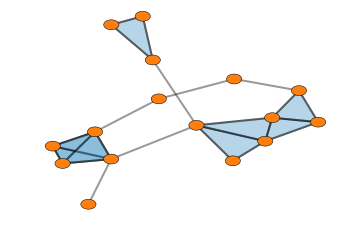

In [11]:
pos = draw_2d_simplicial_complex(simplices, return_pos=True)

In [5]:
pos_fixed = pos.copy()

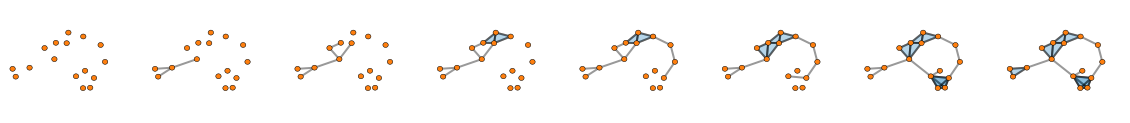

In [12]:
fig = plt.figure(figsize=(20,2))
all_nodes = set(list(itertools.chain(*simplices)))
for i in range(0,len(simplices)+1,3):
    ax = plt.subplot(1,8,1+i/3);
    draw_2d_simplicial_complex(simplices[:i], pos = pos_fixed, return_pos=False, ax=ax, extra_nodes=all_nodes)
    
ax = plt.subplot(1,8,8)
final_simp = simplices.copy()

draw_2d_simplicial_complex(simplices, pos = pos_fixed, return_pos=False, ax=ax, extra_nodes=all_nodes)

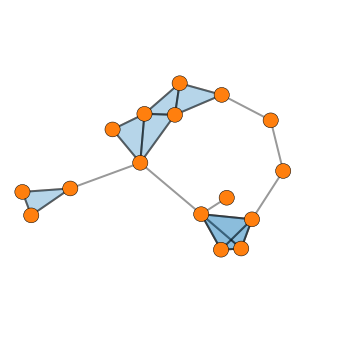

In [13]:
## Complete simplex
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
draw_2d_simplicial_complex(simplices, pos = pos_fixed, ax=ax, return_pos=False, extra_nodes=all_nodes)

0
8
25
32
45


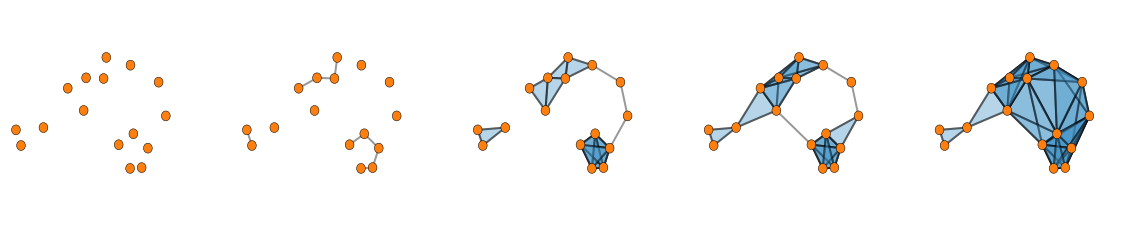

In [14]:
def Compute_RV(pos, epsilon):
    from scipy.spatial.distance import pdist, squareform
    dists = squareform(pdist(pos))
    dists[dists>epsilon] = 0;
#     plt.imshow(dists)
#     plt.colorbar()
    g = nx.from_numpy_array(dists);
    print(g.number_of_edges())
    simplices = list(nx.find_cliques(g))
    return simplices;

fig = plt.figure(figsize=(20,4))
for i, epsilon in enumerate(np.linspace(.1,.7,5)):
    pos_es = [pos_fixed[x] for x in all_nodes]
    stage_simplex = Compute_RV(np.array(list(pos_es)),epsilon)
    ax = plt.subplot(1, 5, i+1);
    draw_2d_simplicial_complex(stage_simplex, pos = pos_fixed, return_pos=False, ax=ax, extra_nodes=all_nodes)
    

0
8
25
32
45


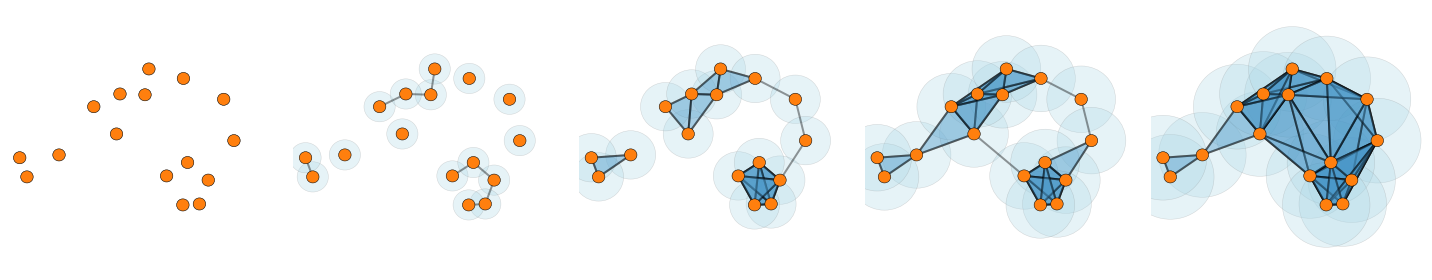

In [15]:
def RV_complex(simplices, radius, pos=None, return_pos=False, ax = None, extra_nodes=None):
    """
    Draw a simplicial complex up to dimension 2 from a list of simplices, as in [1].
        
        Args
        ----
        simplices: list of lists of integers
            List of simplices to draw. Sub-simplices are not needed (only maximal).
            For example, the 2-simplex [1,2,3] will automatically generate the three
            1-simplices [1,2],[2,3],[1,3] and the three 0-simplices [1],[2],[3].
            When a higher order simplex is entered only its sub-simplices
            up to D=2 will be drawn.
        
        pos: dict (default=None)
            If passed, this dictionary of positions d:(x,y) is used for placing the 0-simplices.
            The standard nx spring layour is used otherwise.
           
        ax: matplotlib.pyplot.axes (default=None)
        
        return_pos: dict (default=False)
            If True returns the dictionary of positions for the 0-simplices.
            
        References
        ----------    
        .. [1] I. Iacopini, G. Petri, A. Barrat & V. Latora (2018)
               "Simplicial Models of Social Contagion".
               arXiv preprint arXiv:1810.07031..
    """

    
    #List of 0-simplices
    nodes =list(set(itertools.chain(*simplices)))
    
    #List of 1-simplices
    edges = list(set(itertools.chain(*[[tuple(sorted((i, j))) for i, j in itertools.combinations(simplex, 2)] for simplex in simplices])))

    #List of 2-simplices
    triangles = list(set(itertools.chain(*[[tuple(sorted((i, j, k))) for i, j, k in itertools.combinations(simplex, 3)] for simplex in simplices])))
    
    if ax is None: ax = plt.gca()
    ax.set_xlim([-1.1, 1.1])      
    ax.set_ylim([-1.1, 1.1])
    ax.get_xaxis().set_ticks([])  
    ax.get_yaxis().set_ticks([])
    ax.axis('off')
       
    if pos is None:
        # Creating a networkx Graph from the edgelist
        G = nx.Graph()
        G.add_edges_from(edges)
        # Creating a dictionary for the position of the nodes
        pos = nx.spring_layout(G)
        
    # Drawing the edges
    for i, j in edges:
        (x0, y0) = pos[i]
        (x1, y1) = pos[j]
        line = plt.Line2D([ x0, x1 ], [y0, y1 ],color = 'black', zorder = 1, lw=2, alpha=.4)
        ax.add_line(line);
    
    # Filling in the triangles
    for i, j, k in triangles:
        (x0, y0) = pos[i]
        (x1, y1) = pos[j]
        (x2, y2) = pos[k]
        tri = plt.Polygon([ [ x0, y0 ], [ x1, y1 ], [ x2, y2 ] ],
                          edgecolor = 'black', facecolor = plt.cm.Blues(0.6),
                          zorder = 2, alpha=0.4, lw=2)
        ax.add_patch(tri);

    # Drawing the nodes 
    if extra_nodes!=None:
        nodes.extend(extra_nodes);
        nodes = list(set(nodes))
    for i in nodes:
        (x, y) = pos[i]
        circ = plt.Circle([ x, y ], radius = epsilon/2, zorder = 1, lw=0.5,
                          edgecolor = 'gray', facecolor = 'lightblue', alpha=.3)
        ax.add_patch(circ);
        circ = plt.Circle([ x, y ], radius = 0.05, zorder = 3, lw=0.5,
                          edgecolor = 'Black', facecolor = u'#ff7f0e')
        ax.add_patch(circ);
       



    if return_pos: return pos
    
## Complete simplex
fig = plt.figure(figsize=(20,4))
for i, epsilon in enumerate(np.linspace(.1,.7,5)):
    pos_es = [pos_fixed[x] for x in all_nodes]
    stage_simplex = Compute_RV(np.array(list(pos_es)),epsilon)
    ax = plt.subplot(1, 5, i+1);    
    RV_complex(stage_simplex, epsilon, pos = pos_fixed, ax=ax, return_pos=False, extra_nodes=all_nodes)
plt.tight_layout()